In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

In [ ]:
P_t = 1
rho_c = 1
G = 1

def get_r_t(P_c):
    return np.sqrt(3*(P_c - P_t) / (2 * np.pi * G * rho_c**2))

def R_transcendental(R, Delta, P_c):
    r_t = get_r_t(P_c)
    pre_factor = 4/3 * np.pi * G * (rho_c/Delta)**2
    return pre_factor * (R**3 / 2 + R * r_t**2 * (Delta - 3/2) - r_t**3 * (Delta - 1)) - R * P_t

def find_R(Delta, P_c):
    result = root_scalar(R_transcendental, args=(Delta, P_c), bracket=[0.05, 10], method='bisect')
    return result.root if result.converged else None

def M(R, Delta, P_c):
    r_t = get_r_t(P_c)
    if R is not None and r_t is not None:
        return 4/3 * np.pi * (rho_c/Delta) * (R**3 - r_t**3*(Delta - 1))
    return None

def I(R, Delta, P_c):
    r_t = get_r_t(P_c)
    if R is not None and r_t is not None:
        return 8/15 * np.pi * rho_c / Delta * (R**5 - r_t**5*(Delta - 1))
    return None

In [ ]:
Deltas = np.linspace(1, 2, 7)
P_cs = np.linspace(0, 5, 100)

Rs = np.zeros((len(Deltas), len(P_cs)))
Ms = np.zeros((len(Deltas), len(P_cs)))
Is = np.zeros((len(Deltas), len(P_cs)))

for i, Delta in enumerate(Deltas):
    for j, P_c in enumerate(P_cs):
        Rs[i, j] = find_R(Delta, P_c)
        Ms[i, j] = M(Rs[i, j], Delta, P_c)
        Is[i, j] = I(Rs[i, j], Delta, P_c)

[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


/var/folders/6l/y2z2vm4913sb2lzhwp95z6q00000gn/T/ipykernel_85079/3145364660.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(3*(P_c - P_t) / (2 * np.pi * G * rho_c**2))


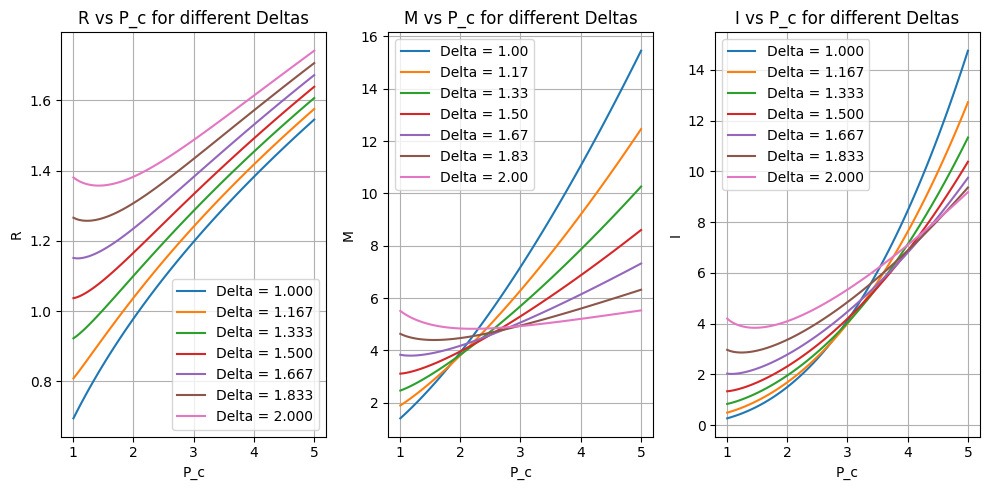

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Plot R vs P_c
for i, Delta in enumerate(Deltas):
    axs[0].plot(P_cs, Rs[i], label=f"Delta = {Delta:.3f}")
axs[0].set_xlabel("P_c")
axs[0].set_ylabel("R")
axs[0].set_title("R vs P_c for different Deltas")
axs[0].legend()
axs[0].grid()

# Plot M vs P_c
for i, Delta in enumerate(Deltas):
    axs[1].plot(P_cs, Ms[i], label=f"Delta = {Delta:.2f}")
axs[1].set_xlabel("P_c")
axs[1].set_ylabel("M")
axs[1].set_title("M vs P_c for different Deltas")
axs[1].legend()
axs[1].grid()

# Plot I vs P_c
for i, Delta in enumerate(Deltas):
    axs[2].plot(P_cs, Is[i], label=f"Delta = {Delta:.3f}")
axs[2].set_xlabel("P_c")
axs[2].set_ylabel("I")
axs[2].set_title("I vs P_c for different Deltas")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.savefig("R_M_I_vs_Pc.png", bbox_inches='tight', dpi=300)
plt.show()

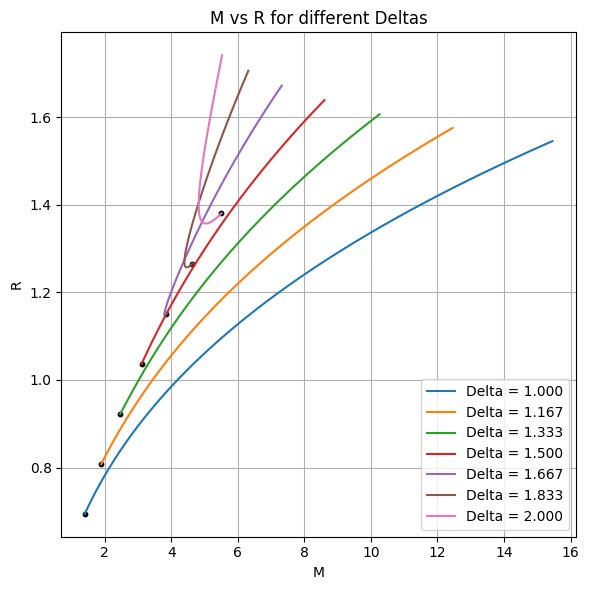

In [127]:
# plot normalized M vs normalized R colored by each Delta
fig, ax = plt.subplots(figsize=(6, 6))

for i, Delta in enumerate(Deltas):
    ax.plot(Ms[i], Rs[i], label=f"Delta = {Delta:.3f}")
    Ms_not_nan = Ms[i][~np.isnan(Ms[i])]
    Rs_not_nan = Rs[i][~np.isnan(Rs[i])]
    ax.scatter(Ms_not_nan[0], Rs_not_nan[0], color='k', s=10)  # mark the starting point
    # ax.plot(Ms[i], Rs[i] / Rs[i].max(), label=f"Delta = {Delta:.2f}")
    # ax.plot(Ms[i] / Ms[i].max(), Rs[i], label=f"Delta = {Delta:.2f}")
    # ax.plot(Ms[i] / Ms[i].max(), Rs[i] / Rs[i].max(), label=f"Delta = {Delta:.2f}")

ax.set_xlabel("M")
ax.set_ylabel("R")
ax.set_title("M vs R for different Deltas")
ax.legend()
ax.grid()

plt.tight_layout()
plt.savefig("M_vs_R.png", bbox_inches='tight', dpi=300)
plt.show()